In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.0 MB 58.8 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 30.6 MB 1.4 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.3

## Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tqdm.notebook import tqdm
import pickle

In [ ]:
print(cv2.__version__)

3.4.2


In [ ]:
folder1=r"/content/drive/MyDrive/Computer Vision/Train_Positive"
folder2=r"/content/drive/MyDrive/Computer Vision/Train_Negative"

In [ ]:
#kernels for prewitt edge detection
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) 
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

# Extracting Features

## Positive Descriptor

In [ ]:
i=1
for filename in tqdm(os.listdir(folder1)):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
   
    #resize image
    resize=(280, 400)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0) #gaussian Image

    img_prewittx = cv2.filter2D(img2, -1, kernelx) #Horizontal 
    img_prewitty = cv2.filter2D(img2, -1, kernely) #Vertical
    img_prewitt = img_prewittx + img_prewitty

    #initialise hog descriptor
    cell_size = (32, 32)  # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 9  # number of orientation bins

    # winSize is the size of the image cropped to an multiple of the cell size
    # cell_size is the size of the cells of the img patch over which to calculate the histograms
    # block_size is the number of cells which fit in the patch
    hog = cv2.HOGDescriptor(_winSize=(img_prewitt.shape[1] // cell_size[1] * cell_size[1],
                                      img_prewitt.shape[0] // cell_size[0] * cell_size[0]),
                _blockSize=(block_size[1] * cell_size[1],
                            block_size[0] * cell_size[0]),
                _blockStride=(cell_size[1], cell_size[0]),
                _cellSize=(cell_size[1], cell_size[0]),
                _nbins=nbins)


    descriptor = hog.compute(img_prewitt)
    
    #norm = Normalizer()
    #normalized = norm.fit_transform(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptor)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('/content/drive/MyDrive/Computer Vision/hog_pos.csv', mode='a', header=False,index=False)

  0%|          | 0/2160 [00:00<?, ?it/s]

descriptor shape  1  :  (2772, 1)
descriptor shape  2  :  (2772, 1)
descriptor shape  3  :  (2772, 1)
descriptor shape  4  :  (2772, 1)
descriptor shape  5  :  (2772, 1)
descriptor shape  6  :  (2772, 1)
descriptor shape  7  :  (2772, 1)
descriptor shape  8  :  (2772, 1)
descriptor shape  9  :  (2772, 1)
descriptor shape  10  :  (2772, 1)
descriptor shape  11  :  (2772, 1)
descriptor shape  12  :  (2772, 1)
descriptor shape  13  :  (2772, 1)
descriptor shape  14  :  (2772, 1)
descriptor shape  15  :  (2772, 1)
descriptor shape  16  :  (2772, 1)
descriptor shape  17  :  (2772, 1)
descriptor shape  18  :  (2772, 1)
descriptor shape  19  :  (2772, 1)
descriptor shape  20  :  (2772, 1)
descriptor shape  21  :  (2772, 1)
descriptor shape  22  :  (2772, 1)
descriptor shape  23  :  (2772, 1)
descriptor shape  24  :  (2772, 1)
descriptor shape  25  :  (2772, 1)
descriptor shape  26  :  (2772, 1)
descriptor shape  27  :  (2772, 1)
descriptor shape  28  :  (2772, 1)
descriptor shape  29  :  (277

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Computer Vision/hog_pos.csv',header=None,dtype='float64')
#MemoryError: Unable to allocate 166. MiB for an array with shape (128, 169606) and data type float64,
#Double-precision floating-point format
# data1=out
data1=data1.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1

,0
0,0.229689
1,0.174360
2,0.104449
3,0.183490
4,0.229689
...,...
5987515,0.166925
5987516,0.216533
5987517,0.278714
5987518,0.278714


## Negative Descriptor

In [ ]:
i=0
for filename in tqdm(os.listdir(folder2)):
    #path
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
   
    #resize image
    resize=(280, 400)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image

    img_prewittx = cv2.filter2D(img2, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(img2, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    #initialise hog descriptor
    
    cell_size = (32, 32)  # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 9  # number of orientation bins

    # winSize is the size of the image cropped to an multiple of the cell size
    # cell_size is the size of the cells of the img patch over which to calculate the histograms
    # block_size is the number of cells which fit in the patch
    hog = cv2.HOGDescriptor(_winSize=(img_prewitt.shape[1] // cell_size[1] * cell_size[1],
                                      img_prewitt.shape[0] // cell_size[0] * cell_size[0]),
                _blockSize=(block_size[1] * cell_size[1],
                            block_size[0] * cell_size[0]),
                _blockStride=(cell_size[1], cell_size[0]),
                _cellSize=(cell_size[1], cell_size[0]),
                _nbins=nbins)


    descriptor = hog.compute(img_prewitt)
    
    #norm = Normalizer()
    #normalized = norm.fit_transform(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptor)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('/content/drive/MyDrive/Computer Vision/hog_neg.csv', mode='a', header=False,index=False)

  0%|          | 0/2015 [00:00<?, ?it/s]

descriptor shape  0  :  (2772, 1)
descriptor shape  1  :  (2772, 1)
descriptor shape  2  :  (2772, 1)
descriptor shape  3  :  (2772, 1)
descriptor shape  4  :  (2772, 1)
descriptor shape  5  :  (2772, 1)
descriptor shape  6  :  (2772, 1)
descriptor shape  7  :  (2772, 1)
descriptor shape  8  :  (2772, 1)
descriptor shape  9  :  (2772, 1)
descriptor shape  10  :  (2772, 1)
descriptor shape  11  :  (2772, 1)
descriptor shape  12  :  (2772, 1)
descriptor shape  13  :  (2772, 1)
descriptor shape  14  :  (2772, 1)
descriptor shape  15  :  (2772, 1)
descriptor shape  16  :  (2772, 1)
descriptor shape  17  :  (2772, 1)
descriptor shape  18  :  (2772, 1)
descriptor shape  19  :  (2772, 1)
descriptor shape  20  :  (2772, 1)
descriptor shape  21  :  (2772, 1)
descriptor shape  22  :  (2772, 1)
descriptor shape  23  :  (2772, 1)
descriptor shape  24  :  (2772, 1)
descriptor shape  25  :  (2772, 1)
descriptor shape  26  :  (2772, 1)
descriptor shape  27  :  (2772, 1)
descriptor shape  28  :  (2772

In [ ]:
data2 = pd.read_csv(r'/content/drive/MyDrive/Computer Vision/hog_neg.csv',header=None,dtype='float64')
#MemoryError: Unable to allocate 166. MiB for an array with shape (128, 169606) and data type float64,
#Double-precision floating-point format

data2=data2.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data2

,0
0,0.226081
1,0.174086
2,0.149069
3,0.113284
4,0.123061
...,...
5585575,0.084848
5585576,0.089680
5585577,0.145747
5585578,0.221032


In [ ]:
data=data1.append(data2)

In [ ]:
csv_data = data.to_csv(r'/content/drive/MyDrive/Computer Vision/hog_final.csv',mode='a', header=False, index=False)

In [ ]:
data= pd.read_csv(r'/content/drive/MyDrive/Computer Vision/hog_final.csv',header=None,dtype='float64')
data=data.astype(np.float64)
data

,0
0,0.229689
1,0.174360
2,0.104449
3,0.183490
4,0.229689
...,...
11573095,0.084848
11573096,0.089680
11573097,0.145747
11573098,0.221032


# Elbow Method

In [ ]:
distortions = []
K = range(3,30, 2)
for k in tqdm(K, total=len(K)):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
    print("For K =" + str(k) + " " + str(kmeanModel.inertia_))
    # print("Done!")+

  0%|          | 0/14 [00:00<?, ?it/s]

For K =3 10714.877261372058
For K =5 4484.493430404541
For K =7 2509.679812149765
For K =9 1620.1377163921443
For K =11 1116.2426606401104
For K =13 808.300920137541
For K =15 620.2047986480145
For K =17 489.30625292225403
For K =19 399.82115107729453
For K =21 331.6218984754525
For K =23 280.3989602999627
For K =25 237.97031619230393
For K =27 203.5503577424982
For K =29 176.28683856324653


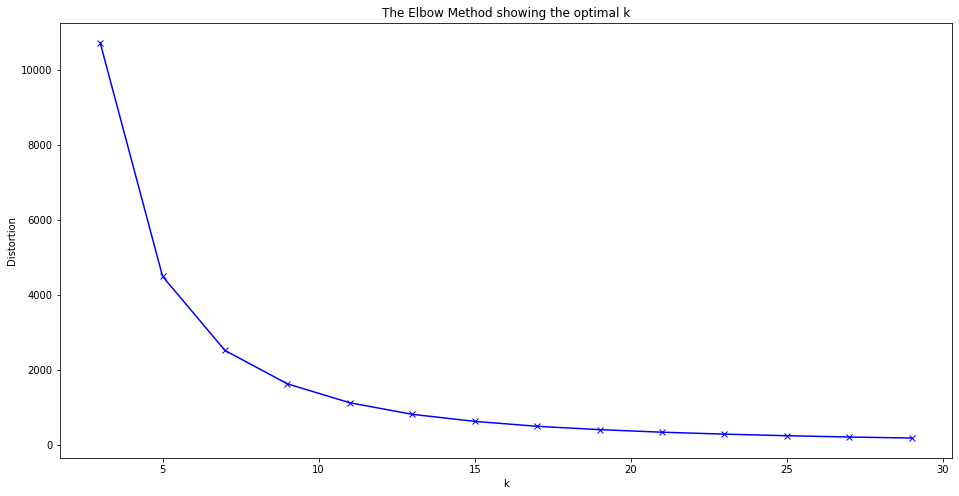

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Kmeans

In [ ]:
kmeans = KMeans(n_clusters=13)
kmeans.fit(data)

KMeans(n_clusters=13)

## Save the model to disk

In [ ]:
filename = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/Kmeans_Model_HoG_Hyper.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [ ]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13])


print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([1290484, 1013046, 1223303,  865151,   42483,  589586,  250567,
       1355053, 1309357, 1131355,  562205,  961135,  979375]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])) 



## Loading HoG Model

In [ ]:
pretrained_model_HoG = pickle.load(open('/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/Kmeans_Model_HoG_Hyper.sav', 'rb'))

# Kmeans prediction using pretrained HoG

In [ ]:
#performing kmeans prediction of the entire positive image dataset with the pretrained kmeans model

#initialising i=1; as its the first class
i=1
data1=[]
#k=0
orientations=9
cellsPerBlock=2
pixelsPerBlock=8
convertColorSpace=False

for filename in tqdm(os.listdir(folder1)):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280, 400)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
    
    img_prewittx = cv2.filter2D(img2, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(img2, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #initialise hog descriptor  
    cell_size = (32, 32)  # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 9  # number of orientation bins
    
    hog = cv2.HOGDescriptor(_winSize=(img_prewitt.shape[1] // cell_size[1] * cell_size[1],
                                      img_prewitt.shape[0] // cell_size[0] * cell_size[0]),
                _blockSize=(block_size[1] * cell_size[1],
                            block_size[0] * cell_size[0]),
                _blockStride=(cell_size[1], cell_size[0]),
                _cellSize=(cell_size[1], cell_size[0]),
                _nbins=nbins)
    
    descriptor = hog.compute(img_prewitt)
    out=pd.DataFrame(descriptor)
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
    hist_list = list(hist)
    hist_list[0] = hist_list[0]/out.shape[0]
    #append the dataframe into the array in append mode, the array will only have 19 values which will store the values in a row
    hist_new = np.concatenate((hist_list[0],hist_list[0]), axis = None)
    data1.append(hist_new)
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data1)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('/content/drive/MyDrive/Computer Vision/HOG_Final_pos.csv', mode='a',header=False,index=False)

  0%|          | 0/2160 [00:00<?, ?it/s]

In [ ]:
Output

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,Class
0,0.125180,0.084776,0.104618,0.089466,0.005772,0.022727,0.014430,0.110390,0.124459,0.113636,...,0.005772,0.022727,0.014430,0.110390,0.124459,0.113636,0.033189,0.078644,0.092713,1
1,0.115079,0.103175,0.095960,0.075036,0.002886,0.025613,0.014069,0.115079,0.118687,0.109307,...,0.002886,0.025613,0.014069,0.115079,0.118687,0.109307,0.036797,0.084416,0.103896,1
2,0.141053,0.118687,0.104978,0.084055,0.000000,0.002525,0.005772,0.134560,0.120491,0.112554,...,0.000000,0.002525,0.005772,0.134560,0.120491,0.112554,0.034993,0.040765,0.099567,1
3,0.125180,0.055916,0.066378,0.108586,0.002165,0.016955,0.004329,0.107504,0.172078,0.149351,...,0.002165,0.016955,0.004329,0.107504,0.172078,0.149351,0.024892,0.040765,0.125902,1
4,0.116162,0.076840,0.090188,0.086219,0.005411,0.037879,0.016234,0.113636,0.125541,0.115440,...,0.005411,0.037879,0.016234,0.113636,0.125541,0.115440,0.041847,0.079365,0.095238,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,0.128788,0.088384,0.069986,0.103175,0.000000,0.040404,0.008658,0.110750,0.146825,0.123377,...,0.000000,0.040404,0.008658,0.110750,0.146825,0.123377,0.023810,0.039683,0.116162,1
2156,0.089827,0.104257,0.105700,0.047258,0.014069,0.150072,0.027056,0.094156,0.053391,0.068903,...,0.014069,0.150072,0.027056,0.094156,0.053391,0.068903,0.068903,0.118687,0.057720,1
2157,0.098846,0.090188,0.105700,0.049784,0.012266,0.128788,0.035354,0.096320,0.058442,0.074675,...,0.012266,0.128788,0.035354,0.096320,0.058442,0.074675,0.069625,0.111833,0.068182,1
2158,0.089466,0.099567,0.130231,0.055556,0.004690,0.085137,0.030664,0.118326,0.057720,0.069625,...,0.004690,0.085137,0.030664,0.118326,0.057720,0.069625,0.084055,0.117965,0.056999,1


In [ ]:
#performing kmeans prediction of the entire negative image dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data2=[]
#k=0
orientations=9
cellsPerBlock=2
pixelsPerBlock=8
convertColorSpace=False

for filename in tqdm(os.listdir(folder2)):
    #path
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280, 400)
    img=cv2.resize(a,resize)

    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
    
    img_prewittx = cv2.filter2D(img2, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(img2, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    #initialise hog descriptor
    
    cell_size = (32, 32)  # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 9  # number of orientation bins

    # winSize is the size of the image cropped to an multiple of the cell size
    # cell_size is the size of the cells of the img patch over which to calculate the histograms
    # block_size is the number of cells which fit in the patch
    
    
    hog = cv2.HOGDescriptor(_winSize=(img_prewitt.shape[1] // cell_size[1] * cell_size[1],
                                      img_prewitt.shape[0] // cell_size[0] * cell_size[0]),
                _blockSize=(block_size[1] * cell_size[1],
                            block_size[0] * cell_size[0]),
                _blockStride=(cell_size[1], cell_size[0]),
                _cellSize=(cell_size[1], cell_size[0]),
                _nbins=nbins)
    
    descriptor = hog.compute(img_prewitt)
    out=pd.DataFrame(descriptor)
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
    hist_list = list(hist)
    hist_list[0] = hist_list[0]/out.shape[0]
    #append the dataframe into the array in append mode, the array will only have 19 values which will store the values in a row
    hist_new = np.concatenate((hist_list[0],hist_list[0]), axis = None)
    data2.append(hist_new)
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data2)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('/content/drive/MyDrive/Computer Vision/HOG_Final_neg.csv', mode='a',header=False,index=False)

  0%|          | 0/2015 [00:00<?, ?it/s]

In [ ]:
Output

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,Class
0,0.125180,0.104257,0.102092,0.085859,0.000000,0.004690,0.001443,0.132395,0.168110,0.107504,...,0.000000,0.004690,0.001443,0.132395,0.168110,0.107504,0.023810,0.052670,0.091991,0
1,0.076479,0.090188,0.111833,0.061688,0.004329,0.124098,0.053391,0.100289,0.090909,0.073232,...,0.004329,0.124098,0.053391,0.100289,0.090909,0.073232,0.032828,0.110390,0.070346,0
2,0.087302,0.054834,0.120130,0.047980,0.008297,0.088384,0.075036,0.104618,0.067460,0.078644,...,0.008297,0.088384,0.075036,0.104618,0.067460,0.078644,0.051587,0.151515,0.064214,0
3,0.111833,0.117605,0.104257,0.089105,0.000000,0.023810,0.014791,0.109307,0.111472,0.113997,...,0.000000,0.023810,0.014791,0.109307,0.111472,0.113997,0.030303,0.076840,0.096681,0
4,0.084055,0.088023,0.118687,0.064214,0.010462,0.084776,0.026696,0.108947,0.092713,0.079726,...,0.010462,0.084776,0.026696,0.108947,0.092713,0.079726,0.055556,0.115440,0.070707,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,0.146825,0.131674,0.080808,0.079004,0.000000,0.000722,0.004329,0.152237,0.141414,0.121212,...,0.000000,0.000722,0.004329,0.152237,0.141414,0.121212,0.010462,0.027778,0.103535,0
2011,0.148268,0.044733,0.048341,0.124459,0.000000,0.000000,0.000000,0.104618,0.203102,0.156926,...,0.000000,0.000000,0.000000,0.104618,0.203102,0.156926,0.002886,0.007937,0.158730,0
2012,0.106421,0.094877,0.095238,0.091631,0.000000,0.031746,0.009740,0.120851,0.127706,0.108225,...,0.000000,0.031746,0.009740,0.120851,0.127706,0.108225,0.047980,0.080808,0.084776,0
2013,0.107143,0.128788,0.126984,0.062771,0.000000,0.028499,0.011183,0.121212,0.102453,0.075758,...,0.000000,0.028499,0.011183,0.121212,0.102453,0.075758,0.066017,0.108947,0.060245,0


## Final CSVs

In [ ]:
#Displaying the kmeans predicted data
print("Positive Images")
dat1= pd.read_csv(r'/content/drive/MyDrive/Computer Vision/HOG_Final_pos.csv',header=None)
dat1

Positive Images


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.125180,0.084776,0.104618,0.089466,0.005772,0.022727,0.014430,0.110390,0.124459,0.113636,...,0.005772,0.022727,0.014430,0.110390,0.124459,0.113636,0.033189,0.078644,0.092713,1
1,0.115079,0.103175,0.095960,0.075036,0.002886,0.025613,0.014069,0.115079,0.118687,0.109307,...,0.002886,0.025613,0.014069,0.115079,0.118687,0.109307,0.036797,0.084416,0.103896,1
2,0.141053,0.118687,0.104978,0.084055,0.000000,0.002525,0.005772,0.134560,0.120491,0.112554,...,0.000000,0.002525,0.005772,0.134560,0.120491,0.112554,0.034993,0.040765,0.099567,1
3,0.125180,0.055916,0.066378,0.108586,0.002165,0.016955,0.004329,0.107504,0.172078,0.149351,...,0.002165,0.016955,0.004329,0.107504,0.172078,0.149351,0.024892,0.040765,0.125902,1
4,0.116162,0.076840,0.090188,0.086219,0.005411,0.037879,0.016234,0.113636,0.125541,0.115440,...,0.005411,0.037879,0.016234,0.113636,0.125541,0.115440,0.041847,0.079365,0.095238,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,0.128788,0.088384,0.069986,0.103175,0.000000,0.040404,0.008658,0.110750,0.146825,0.123377,...,0.000000,0.040404,0.008658,0.110750,0.146825,0.123377,0.023810,0.039683,0.116162,1
2156,0.089827,0.104257,0.105700,0.047258,0.014069,0.150072,0.027056,0.094156,0.053391,0.068903,...,0.014069,0.150072,0.027056,0.094156,0.053391,0.068903,0.068903,0.118687,0.057720,1
2157,0.098846,0.090188,0.105700,0.049784,0.012266,0.128788,0.035354,0.096320,0.058442,0.074675,...,0.012266,0.128788,0.035354,0.096320,0.058442,0.074675,0.069625,0.111833,0.068182,1
2158,0.089466,0.099567,0.130231,0.055556,0.004690,0.085137,0.030664,0.118326,0.057720,0.069625,...,0.004690,0.085137,0.030664,0.118326,0.057720,0.069625,0.084055,0.117965,0.056999,1


In [ ]:
#Displaying the kmeans predicted data
print("Negative Images")
dat2= pd.read_csv(r'/content/drive/MyDrive/Computer Vision/HOG_Final_neg.csv',header=None)
print(dat2)

Negative Images
            0         1         2         3         4         5         6   \
0     0.125180  0.104257  0.102092  0.085859  0.000000  0.004690  0.001443   
1     0.076479  0.090188  0.111833  0.061688  0.004329  0.124098  0.053391   
2     0.087302  0.054834  0.120130  0.047980  0.008297  0.088384  0.075036   
3     0.111833  0.117605  0.104257  0.089105  0.000000  0.023810  0.014791   
4     0.084055  0.088023  0.118687  0.064214  0.010462  0.084776  0.026696   
...        ...       ...       ...       ...       ...       ...       ...   
2010  0.146825  0.131674  0.080808  0.079004  0.000000  0.000722  0.004329   
2011  0.148268  0.044733  0.048341  0.124459  0.000000  0.000000  0.000000   
2012  0.106421  0.094877  0.095238  0.091631  0.000000  0.031746  0.009740   
2013  0.107143  0.128788  0.126984  0.062771  0.000000  0.028499  0.011183   
2014  0.129149  0.126623  0.115801  0.080808  0.000000  0.007215  0.004329   

            7         8         9   ...        

In [ ]:
#appending All classes into 1 csv file

A=dat1.append(dat2)
csv_data=A.to_csv('/content/drive/MyDrive/Computer Vision/FinalFV.csv', mode='a',header=False,index=False)

In [ ]:
A = pd.read_csv(r'/content/drive/MyDrive/Computer Vision/FinalFV.csv',header=None)

In [ ]:
A

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.125180,0.084776,0.104618,0.089466,0.005772,0.022727,0.014430,0.110390,0.124459,0.113636,...,0.005772,0.022727,0.014430,0.110390,0.124459,0.113636,0.033189,0.078644,0.092713,1
1,0.115079,0.103175,0.095960,0.075036,0.002886,0.025613,0.014069,0.115079,0.118687,0.109307,...,0.002886,0.025613,0.014069,0.115079,0.118687,0.109307,0.036797,0.084416,0.103896,1
2,0.141053,0.118687,0.104978,0.084055,0.000000,0.002525,0.005772,0.134560,0.120491,0.112554,...,0.000000,0.002525,0.005772,0.134560,0.120491,0.112554,0.034993,0.040765,0.099567,1
3,0.125180,0.055916,0.066378,0.108586,0.002165,0.016955,0.004329,0.107504,0.172078,0.149351,...,0.002165,0.016955,0.004329,0.107504,0.172078,0.149351,0.024892,0.040765,0.125902,1
4,0.116162,0.076840,0.090188,0.086219,0.005411,0.037879,0.016234,0.113636,0.125541,0.115440,...,0.005411,0.037879,0.016234,0.113636,0.125541,0.115440,0.041847,0.079365,0.095238,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,0.146825,0.131674,0.080808,0.079004,0.000000,0.000722,0.004329,0.152237,0.141414,0.121212,...,0.000000,0.000722,0.004329,0.152237,0.141414,0.121212,0.010462,0.027778,0.103535,0
4171,0.148268,0.044733,0.048341,0.124459,0.000000,0.000000,0.000000,0.104618,0.203102,0.156926,...,0.000000,0.000000,0.000000,0.104618,0.203102,0.156926,0.002886,0.007937,0.158730,0
4172,0.106421,0.094877,0.095238,0.091631,0.000000,0.031746,0.009740,0.120851,0.127706,0.108225,...,0.000000,0.031746,0.009740,0.120851,0.127706,0.108225,0.047980,0.080808,0.084776,0
4173,0.107143,0.128788,0.126984,0.062771,0.000000,0.028499,0.011183,0.121212,0.102453,0.075758,...,0.000000,0.028499,0.011183,0.121212,0.102453,0.075758,0.066017,0.108947,0.060245,0


In [ ]:
x = A.iloc[:,0:26].values   #getting the first 26 values of dataframe A into x

In [ ]:
x

array([[0.12518038, 0.08477633, 0.1046176 , ..., 0.03318903, 0.07864358,
        0.09271284],
       [0.11507937, 0.1031746 , 0.0959596 , ..., 0.03679654, 0.08441558,
        0.1038961 ],
       [0.14105339, 0.11868687, 0.10497835, ..., 0.03499278, 0.04076479,
        0.0995671 ],
       ...,
       [0.10642136, 0.09487734, 0.0952381 , ..., 0.0479798 , 0.08080808,
        0.08477633],
       [0.10714286, 0.12878788, 0.12698413, ..., 0.06601732, 0.10894661,
        0.06024531],
       [0.12914863, 0.12662338, 0.11580087, ..., 0.03571429, 0.05194805,
        0.08982684]])

In [ ]:
y = A.iloc[:,26].values        #getting the last 27th column values in y as target variable

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

# Dimensionality reduction using PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=None)
#pca.fit(Dhoni)
pca.fit(x)

PCA()

In [ ]:
Bhumi = pca.transform(x)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# DhoniS = StandardScaler()
# Dhoni = DhoniS.fit_transform(x)

In [ ]:
# Dhoni

In [ ]:
Bhumi

array([[-5.27331893e-02, -9.18429774e-03,  1.44463746e-02, ...,
        -4.05536251e-18,  6.31438865e-18, -2.86189391e-18],
       [-3.87998566e-02, -1.99598167e-02, -2.29232373e-03, ...,
        -1.56199626e-18,  1.97280159e-18,  2.60729229e-18],
       [-9.51794675e-02, -5.78382454e-02, -3.13710668e-02, ...,
         2.27030438e-18,  7.41356228e-18, -1.03281118e-17],
       ...,
       [-3.80507959e-02, -1.02172543e-02,  2.79877672e-03, ...,
         7.68657312e-18,  4.79086381e-18,  4.12630809e-18],
       [ 3.85578134e-02, -8.23592214e-02, -1.39790685e-02, ...,
         9.83249073e-18,  4.30627934e-18, -8.35954902e-18],
       [-7.34978368e-02, -6.75469127e-02, -3.86184999e-02, ...,
         7.80625564e-18,  1.73472348e-18, -7.07801700e-18]])

In [ ]:
Bhumi = pd.DataFrame(Bhumi)

In [ ]:
Bhumi

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.052733,-0.009184,0.014446,-0.014365,-0.007381,0.017671,-0.000071,0.010702,-0.007362,-0.012474,...,-1.042696e-18,4.127104e-18,-5.353122e-18,2.872731e-18,6.475602e-19,-7.242876e-18,-7.283608e-18,-4.055363e-18,6.314389e-18,-2.861894e-18
1,-0.038800,-0.019960,-0.002292,-0.023951,-0.017390,0.014978,0.011143,-0.002299,-0.007282,0.008259,...,-1.078328e-17,-7.974342e-18,6.218862e-18,2.283742e-18,6.096387e-18,4.266475e-19,2.379554e-18,-1.561996e-18,1.972802e-18,2.607292e-18
2,-0.095179,-0.057838,-0.031371,-0.021796,0.024964,0.001555,0.003921,0.004425,0.006326,-0.006117,...,-6.029679e-18,-7.737223e-18,8.842354e-18,6.851079e-18,-8.219765e-19,-1.504436e-18,2.136947e-18,2.270304e-18,7.413562e-18,-1.032811e-17
3,-0.158754,0.061059,0.029648,-0.029498,-0.007245,-0.000488,-0.004096,0.001738,-0.013376,0.016330,...,6.146761e-18,5.590005e-18,6.956854e-19,-6.246593e-18,7.567292e-18,-3.029298e-18,4.460963e-18,-2.272233e-18,-4.328878e-18,1.243940e-17
4,-0.041703,0.015806,0.016857,-0.015479,-0.004940,0.004340,0.006821,-0.002564,-0.008620,0.002304,...,3.080875e-19,1.610505e-18,1.349888e-18,2.596212e-18,4.952007e-20,-1.685352e-18,-1.776134e-18,5.330545e-19,1.238803e-18,5.892827e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,-0.139975,-0.046470,-0.064167,-0.010758,0.026758,0.017097,0.031168,-0.011011,-0.000709,0.009334,...,-1.240874e-17,-1.533743e-17,1.607211e-17,-4.995832e-18,5.833196e-18,1.435908e-17,1.540901e-17,3.140838e-18,7.812010e-18,1.867181e-18
4171,-0.250774,0.090995,0.028855,-0.038516,0.000778,0.008571,-0.006585,0.003215,-0.001825,0.005717,...,1.193997e-18,1.031499e-17,3.316264e-18,-1.982657e-17,2.080768e-18,-2.176315e-18,6.683583e-18,-3.592524e-18,-1.868781e-18,8.071080e-18
4172,-0.038051,-0.010217,0.002799,-0.008481,-0.020219,-0.006887,0.003384,-0.014254,-0.000976,0.003929,...,-2.312943e-18,-1.360822e-18,1.541789e-18,1.875481e-18,-4.098926e-18,-4.917722e-18,-9.712984e-18,7.686573e-18,4.790864e-18,4.126308e-18
4173,0.038558,-0.082359,-0.013979,0.012872,-0.033271,-0.012711,0.014135,0.002678,0.005558,-0.009584,...,-6.871835e-18,-6.709732e-18,-5.782503e-19,-1.156398e-19,-9.026446e-19,-1.730427e-18,-9.407520e-18,9.832491e-18,4.306279e-18,-8.359549e-18


In [ ]:
Bhumi.shape

(4175, 26)

## Calculating number of components required

In [ ]:
print(pca.explained_variance_ratio_) 

[6.91159726e-01 1.66586356e-01 5.03857114e-02 2.89874970e-02
 1.99987204e-02 1.74237703e-02 8.38285084e-03 5.00239832e-03
 4.24252440e-03 4.17742731e-03 3.42232604e-03 2.30692014e-04
 1.04374932e-31 5.53983787e-33 5.53983787e-33 5.53983787e-33
 5.53983787e-33 5.53983787e-33 5.53983787e-33 5.53983787e-33
 5.53983787e-33 5.53983787e-33 5.53983787e-33 5.53983787e-33
 5.53983787e-33 3.73624785e-34]


In [ ]:
#pca = PCA(n_components=18)
#pca.fit(Dhoni)

Text(0, 0.5, 'cumulative explained variance')

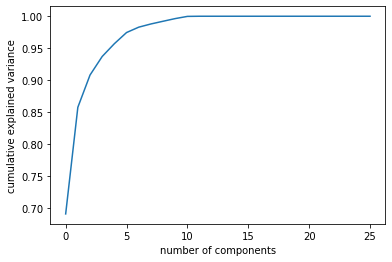

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
l = pca.explained_variance_ratio_
l = l[:8]
l.sum()

0.9879270302399494

In [ ]:
pca = PCA(n_components=8)
pca.fit(x)

PCA(n_components=8)

In [ ]:
# save the model to disk
filename = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/Hyper_PCA_Model_8.sav'
pickle.dump(pca, open(filename, 'wb'))

In [ ]:
filename = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/Hyper_PCA_Model_8.sav'
pca = pickle.load(open(filename, 'rb'))

## Reducing the dimensions from 26 to 8

In [ ]:
Bhumi = pca.transform(x)

In [ ]:
Bhumi

array([[-5.27331893e-02, -9.18429774e-03,  1.44463746e-02, ...,
         1.76707900e-02, -7.12203766e-05,  1.07018236e-02],
       [-3.87998566e-02, -1.99598167e-02, -2.29232373e-03, ...,
         1.49784363e-02,  1.11433719e-02, -2.29853538e-03],
       [-9.51794675e-02, -5.78382454e-02, -3.13710668e-02, ...,
         1.55461282e-03,  3.92092372e-03,  4.42464356e-03],
       ...,
       [-3.80507959e-02, -1.02172543e-02,  2.79877672e-03, ...,
        -6.88657978e-03,  3.38388659e-03, -1.42536049e-02],
       [ 3.85578134e-02, -8.23592214e-02, -1.39790685e-02, ...,
        -1.27114394e-02,  1.41353766e-02,  2.67767636e-03],
       [-7.34978368e-02, -6.75469127e-02, -3.86184999e-02, ...,
         1.34873260e-04, -3.13618903e-03,  1.67068779e-03]])

In [ ]:
Bhumi.shape

(4175, 8)

In [ ]:
Bhumi = pd.DataFrame(Bhumi)

In [ ]:
print(pca.explained_variance_ratio_.sum()) 

0.9879270302399492


In [ ]:
Bhumi

,0,1,2,3,4,5,6,7
0,-0.052733,-0.009184,0.014446,-0.014365,-0.007381,0.017671,-0.000071,0.010702
1,-0.038800,-0.019960,-0.002292,-0.023951,-0.017390,0.014978,0.011143,-0.002299
2,-0.095179,-0.057838,-0.031371,-0.021796,0.024964,0.001555,0.003921,0.004425
3,-0.158754,0.061059,0.029648,-0.029498,-0.007245,-0.000488,-0.004096,0.001738
4,-0.041703,0.015806,0.016857,-0.015479,-0.004940,0.004340,0.006821,-0.002564
...,...,...,...,...,...,...,...,...
4170,-0.139975,-0.046470,-0.064167,-0.010758,0.026758,0.017097,0.031168,-0.011011
4171,-0.250774,0.090995,0.028855,-0.038516,0.000778,0.008571,-0.006585,0.003215
4172,-0.038051,-0.010217,0.002799,-0.008481,-0.020219,-0.006887,0.003384,-0.014254
4173,0.038558,-0.082359,-0.013979,0.012872,-0.033271,-0.012711,0.014135,0.002678


In [ ]:
B=pd.concat([Bhumi, pd.DataFrame(y)],axis=1)  #Adding Label Column

In [ ]:
B

,0,1,2,3,4,5,6,7,0
0,-0.052733,-0.009184,0.014446,-0.014365,-0.007381,0.017671,-0.000071,0.010702,1
1,-0.038800,-0.019960,-0.002292,-0.023951,-0.017390,0.014978,0.011143,-0.002299,1
2,-0.095179,-0.057838,-0.031371,-0.021796,0.024964,0.001555,0.003921,0.004425,1
3,-0.158754,0.061059,0.029648,-0.029498,-0.007245,-0.000488,-0.004096,0.001738,1
4,-0.041703,0.015806,0.016857,-0.015479,-0.004940,0.004340,0.006821,-0.002564,1
...,...,...,...,...,...,...,...,...,...
4170,-0.139975,-0.046470,-0.064167,-0.010758,0.026758,0.017097,0.031168,-0.011011,0
4171,-0.250774,0.090995,0.028855,-0.038516,0.000778,0.008571,-0.006585,0.003215,0
4172,-0.038051,-0.010217,0.002799,-0.008481,-0.020219,-0.006887,0.003384,-0.014254,0
4173,0.038558,-0.082359,-0.013979,0.012872,-0.033271,-0.012711,0.014135,0.002678,0


In [ ]:
csv_data=B.to_csv('/content/drive/MyDrive/Computer Vision/PCA_8_Features.csv', mode='a',header=False,index=False)

# Training ,Testing & Classification

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Computer Vision/PCA_8_Features.csv', header=None)

In [ ]:
data

,0,1,2,3,4,5,6,7,8
0,-0.052733,-0.009184,0.014446,-0.014365,-0.007381,0.017671,-0.000071,0.010702,1
1,-0.038800,-0.019960,-0.002292,-0.023951,-0.017390,0.014978,0.011143,-0.002299,1
2,-0.095179,-0.057838,-0.031371,-0.021796,0.024964,0.001555,0.003921,0.004425,1
3,-0.158754,0.061059,0.029648,-0.029498,-0.007245,-0.000488,-0.004096,0.001738,1
4,-0.041703,0.015806,0.016857,-0.015479,-0.004940,0.004340,0.006821,-0.002564,1
...,...,...,...,...,...,...,...,...,...
4170,-0.139975,-0.046470,-0.064167,-0.010758,0.026758,0.017097,0.031168,-0.011011,0
4171,-0.250774,0.090995,0.028855,-0.038516,0.000778,0.008571,-0.006585,0.003215,0
4172,-0.038051,-0.010217,0.002799,-0.008481,-0.020219,-0.006887,0.003384,-0.014254,0
4173,0.038558,-0.082359,-0.013979,0.012872,-0.033271,-0.012711,0.014135,0.002678,0


In [ ]:
#assigning x the columns from 1 to 128 for training
x = data.iloc[:,0:8].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = data.iloc[:,8]
print("Y values")
print(y)

X values
[[-5.27331893e-02 -9.18429774e-03  1.44463746e-02 ...  1.76707900e-02
  -7.12203766e-05  1.07018236e-02]
 [-3.87998566e-02 -1.99598167e-02 -2.29232373e-03 ...  1.49784363e-02
   1.11433719e-02 -2.29853538e-03]
 [-9.51794675e-02 -5.78382454e-02 -3.13710668e-02 ...  1.55461282e-03
   3.92092372e-03  4.42464356e-03]
 ...
 [-3.80507959e-02 -1.02172543e-02  2.79877672e-03 ... -6.88657978e-03
   3.38388659e-03 -1.42536049e-02]
 [ 3.85578134e-02 -8.23592214e-02 -1.39790685e-02 ... -1.27114394e-02
   1.41353766e-02  2.67767636e-03]
 [-7.34978368e-02 -6.75469127e-02 -3.86184999e-02 ...  1.34873260e-04
  -3.13618903e-03  1.67068779e-03]]
Y values
0       1
1       1
2       1
3       1
4       1
       ..
4170    0
4171    0
4172    0
4173    0
4174    0
Name: 8, Length: 4175, dtype: int64


## Dataset split into train and test with 80% Training and 20% Testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix

## Classification using 7 classifiers.

### Model 1 Decision Tree

Decision Tree Results
Train Accuracy: 0.884431137724551
Test Accuracy: 0.7844311377245509
Precision Score:  0.7621951219512195
Recall Score:  0.8561643835616438
F1 Score:  0.8064516129032258
Confusion Matrix: 
[[280 117]
 [ 63 375]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7fbbb2faf990>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


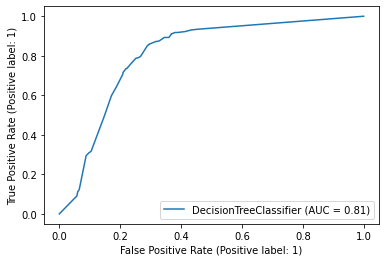

In [ ]:
#Decision Tree Classifier
model1 = DecisionTreeClassifier(max_depth=9)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
CM = confusion_matrix(y_test, y_pred1)
print("Decision Tree Results")
print("Train Accuracy:",model1.score(x_train, y_train))
print("Test Accuracy:",model1.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1)) # true positive rate, Sensitivity
print("F1 Score: ",metrics.f1_score(y_test, y_pred1))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
print("ROC curve ",metrics.plot_roc_curve(model1,x_test, y_test))

filename = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/DT_Model.pkl'
pickle.dump(model1, open(filename, 'wb'))

### Model 2 Random Forest 

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.8574850299401198
Precision Score:  0.843010752688172
Recall Score:  0.8949771689497716
F1 Score:  0.8682170542635658
Confusion Matrix: 
[[324  73]
 [ 46 392]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7fbbb3178a10>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


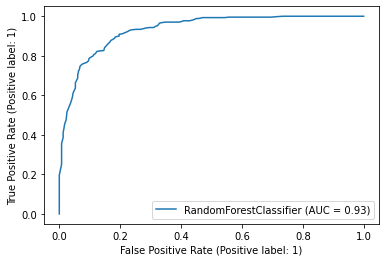

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
CM = confusion_matrix(y_test, y_pred2)

print("Random Forest Clasifier")
print("Train Accuracy:",model2.score(x_train, y_train))
print("Test Accuracy:",model2.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2)) #True positive rate
print("F1 Score: ",metrics.f1_score(y_test, y_pred2))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2))
print("ROC curve ",metrics.plot_roc_curve(model2,x_test, y_test))

filename = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/RF_Model.pkl'
pickle.dump(model2, open(filename, 'wb'))

### Model 3  K Neighbors

KNN
Train Accuracy: 0.7925149700598803
Test Accuracy: 0.7856287425149701
Precision Score:  0.7637474541751528
Recall Score:  0.8561643835616438
F1 Score:  0.8073196986006459
Confusion Matrix: 
[[281 116]
 [ 63 375]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7fbbb85cbc10>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


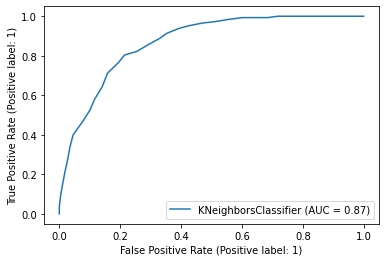

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors = 29)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
CM = confusion_matrix(y_test, y_pred3)
print("KNN")
print("Train Accuracy:",model3.score(x_train, y_train))
print("Test Accuracy:",model3.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3))
print("ROC curve ",metrics.plot_roc_curve(model3,x_test, y_test))

filename = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/KNN_Model.pkl'
pickle.dump(model3, open(filename, 'wb'))

### Model 4 G Naive Bayes

Logistic Regression
Train Accuracy: 0.7362275449101796
Test Accuracy: 0.7305389221556886
Precision Score:  0.7084148727984344
Recall Score:  0.8264840182648402
F1 Score:  0.7629083245521602
Confusion Matrix: 
[[248 149]
 [ 76 362]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7fbbb8814110>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


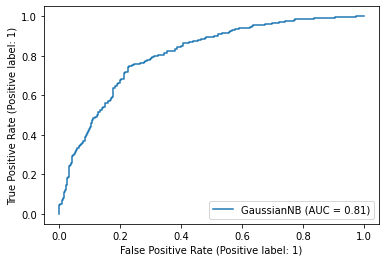

In [ ]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
CM = confusion_matrix(y_test, y_pred4)

print("Logistic Regression")
print("Train Accuracy:",model4.score(x_train, y_train))
print("Test Accuracy:",model4.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred4))
print("Recall Score: ",metrics.recall_score(y_test, y_pred4))
print("F1 Score: ",metrics.f1_score(y_test, y_pred4))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred4))
print("ROC curve ",metrics.plot_roc_curve(model4,x_test, y_test))

filename = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/NB_Model.pkl'
pickle.dump(model4, open(filename, 'wb'))

### Model 5 SVM Linear 

SVM Linear kernel
Train Accuracy: 0.6664670658682634
Test Accuracy: 0.651497005988024
Precision Score:  0.7261538461538461
Recall Score:  0.5388127853881278
F1 Score:  0.618610747051114
Confusion Matrix: 
[[308  89]
 [202 236]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7fbbb876fe50>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


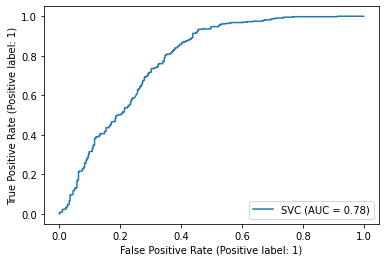

In [ ]:
from sklearn import svm
model5 = svm.SVC(kernel='linear', probability=True)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
CM = confusion_matrix(y_test, y_pred5)
print("SVM Linear kernel")
print("Train Accuracy:",model5.score(x_train, y_train))
print("Test Accuracy:",model5.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred5))
print("Recall Score: ",metrics.recall_score(y_test, y_pred5))
print("F1 Score: ",metrics.f1_score(y_test, y_pred5))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred5))
print("ROC curve ",metrics.plot_roc_curve(model5,x_test, y_test))

filename = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/SVML_Model.pkl'
pickle.dump(model5, open(filename, 'wb'))

### Model 6 SVM Poly

SVM Polynomial
Train Accuracy: 0.7224550898203593
Test Accuracy: 0.7221556886227545
Precision Score:  0.6694078947368421
Recall Score:  0.9292237442922374
F1 Score:  0.7782026768642448
Confusion Matrix: 
[[196 201]
 [ 31 407]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7fbbb874df10>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


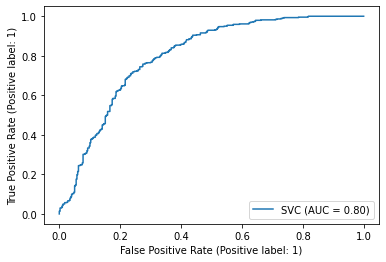

In [ ]:
model6 = svm.SVC(kernel='poly', degree=3, probability=True)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
CM = confusion_matrix(y_test, y_pred6)
print("SVM Polynomial")
print("Train Accuracy:",model6.score(x_train, y_train))
print("Test Accuracy:",model6.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred6))
print("Recall Score: ",metrics.recall_score(y_test, y_pred6))
print("F1 Score: ",metrics.f1_score(y_test, y_pred6))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred6))
print("ROC curve ",metrics.plot_roc_curve(model6,x_test, y_test))

filename = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/SVMP_Model.pkl'
pickle.dump(model6, open(filename, 'wb'))

### Model 7 SVM Sigmoid

SVM sigmoid
Train Accuracy: 0.5224550898203593
Test Accuracy: 0.511377245508982
Precision Score:  0.5367647058823529
Recall Score:  0.5
F1 Score:  0.5177304964539008
Confusion Matrix: 
[[208 189]
 [219 219]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7fbbb878a110>


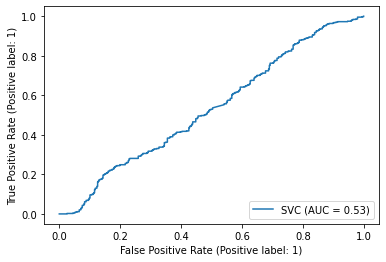

In [ ]:
model7 = svm.SVC(kernel='sigmoid', probability=True)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
CM = confusion_matrix(y_test, y_pred7)
print("SVM sigmoid")
print("Train Accuracy:",model7.score(x_train, y_train))
print("Test Accuracy:",model7.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred7))
print("Recall Score: ",metrics.recall_score(y_test, y_pred7))
print("F1 Score: ",metrics.f1_score(y_test, y_pred7))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred7))
print("ROC curve ",metrics.plot_roc_curve(model7,x_test, y_test))

filename = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/SVMS_Model.pkl'
pickle.dump(model7, open(filename, 'wb'))

#### Loading Models

### Voting Based Classifier 

In [ ]:
filename1 = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/DT_Model.pkl'
model1 = pickle.load(open(filename1, 'rb'))

filename2 = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/RF_Model.pkl'
model2 = pickle.load(open(filename2, 'rb'))

filename4 = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/KNN_Model.pkl'
model3 = pickle.load(open(filename3, 'rb'))

filename4 = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/NB_Model.pkl'
model4 = pickle.load(open(filename4, 'rb'))

filename6 = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/SVMP_Model.pkl'
model6 = pickle.load(open(filename6, 'rb'))

#### Soft Voting Classifier 

In [ ]:
from sklearn.ensemble import VotingClassifier

vmodel = VotingClassifier( estimators=[('DT', model1 ), ('RF', model2),('KNN', model3), ('NB', model4), ('SVM', model6)], voting='soft')
vmodel.fit(x_train, y_train)
voting_pred_s = vmodel.predict(x_test)
CM = confusion_matrix(y_test, voting_pred_s)
print("Voting Classifier Soft")
print("Train Accuracy:",vmodel.score(x_train, y_train))
print("Test Accuracy:",vmodel.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, voting_pred_s))
print("Recall Score: ",metrics.recall_score(y_test, voting_pred_s))
print("F1 Score: ",metrics.f1_score(y_test, voting_pred_s))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, voting_pred_s))
#print("ROC curve ",metrics.plot_roc_curve(model9,x_test, y_test))

Voting Classifier Soft
Train Accuracy: 0.9101796407185628
Test Accuracy: 0.8083832335329342
Precision Score:  0.780241935483871
Recall Score:  0.8835616438356164
F1 Score:  0.828693790149893
Confusion Matrix: 
[[288 109]
 [ 51 387]]


#### Hard Voting Classifier 

In [ ]:
from sklearn.ensemble import VotingClassifier

vmodel = VotingClassifier( estimators=[('DT', model1 ), ('RF', model2),('KNN', model3), ('NB', model4), ('SVM', model6)], voting='hard')
vmodel.fit(x_train, y_train)
voting_pred_s = vmodel.predict(x_test)
CM = confusion_matrix(y_test, voting_pred_s)
print("Voting Classifier Hard")
print("Train Accuracy:",vmodel.score(x_train, y_train))
print("Test Accuracy:",vmodel.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, voting_pred_s))
print("Recall Score: ",metrics.recall_score(y_test, voting_pred_s))
print("F1 Score: ",metrics.f1_score(y_test, voting_pred_s))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, voting_pred_s))
#print("ROC curve ",metrics.plot_roc_curve(model9,x_test, y_test))

Voting Classifier Hard
Train Accuracy: 0.8670658682634731
Test Accuracy: 0.8059880239520958
Precision Score:  0.76953125
Recall Score:  0.8995433789954338
F1 Score:  0.8294736842105265
Confusion Matrix: 
[[279 118]
 [ 44 394]]


# Predicting with Test dataset

In [ ]:
folder3=r"/content/drive/MyDrive/Computer Vision/Test_Positive"
folder4=r"/content/drive/MyDrive/Computer Vision/Test_Negative"

In [ ]:
filename1 = "/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/Kmeans_Model_HoG_Hyper.sav"
kmeans = pickle.load(open(filename1, 'rb'))

In [ ]:
#performing kmeans prediction of the entire test positive image dataset with the pretrained kmeans model

#initialising i=1; as its the first class
i=1
data1=[]
#k=0
orientations=9
cellsPerBlock=2
pixelsPerBlock=8
convertColorSpace=False

for filename in tqdm(os.listdir(folder1)):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280, 400)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
    
    img_prewittx = cv2.filter2D(img2, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(img2, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #initialise hog descriptor  
    cell_size = (32, 32)  # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 9  # number of orientation bins
    
    hog = cv2.HOGDescriptor(_winSize=(img_prewitt.shape[1] // cell_size[1] * cell_size[1],
                                      img_prewitt.shape[0] // cell_size[0] * cell_size[0]),
                _blockSize=(block_size[1] * cell_size[1],
                            block_size[0] * cell_size[0]),
                _blockStride=(cell_size[1], cell_size[0]),
                _cellSize=(cell_size[1], cell_size[0]),
                _nbins=nbins)
    
    descriptor = hog.compute(img_prewitt)
    out=pd.DataFrame(descriptor)
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
    hist_list = list(hist)
    hist_list[0] = hist_list[0]/out.shape[0]
    #append the dataframe into the array in append mode, the array will only have 19 values which will store the values in a row
    hist_new = np.concatenate((hist_list[0],hist_list[0]), axis = None)
    data1.append(hist_new)
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data1)
#add row class 
Output["Class"] = i  
csv_data=Output.to_csv('/content/drive/MyDrive/Computer Vision/Test_Positive.csv', mode='a',header=False,index=False)

  0%|          | 0/2160 [00:00<?, ?it/s]

In [ ]:
Output

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,Class
0,0.125180,0.084776,0.104618,0.089466,0.005772,0.022727,0.014430,0.110390,0.124459,0.113636,...,0.005772,0.022727,0.014430,0.110390,0.124459,0.113636,0.033189,0.078644,0.092713,1
1,0.115079,0.103175,0.095960,0.075036,0.002886,0.025613,0.014069,0.115079,0.118687,0.109307,...,0.002886,0.025613,0.014069,0.115079,0.118687,0.109307,0.036797,0.084416,0.103896,1
2,0.141053,0.118687,0.104978,0.084055,0.000000,0.002525,0.005772,0.134560,0.120491,0.112554,...,0.000000,0.002525,0.005772,0.134560,0.120491,0.112554,0.034993,0.040765,0.099567,1
3,0.125180,0.055916,0.066378,0.108586,0.002165,0.016955,0.004329,0.107504,0.172078,0.149351,...,0.002165,0.016955,0.004329,0.107504,0.172078,0.149351,0.024892,0.040765,0.125902,1
4,0.116162,0.076840,0.090188,0.086219,0.005411,0.037879,0.016234,0.113636,0.125541,0.115440,...,0.005411,0.037879,0.016234,0.113636,0.125541,0.115440,0.041847,0.079365,0.095238,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,0.128788,0.088384,0.069986,0.103175,0.000000,0.040404,0.008658,0.110750,0.146825,0.123377,...,0.000000,0.040404,0.008658,0.110750,0.146825,0.123377,0.023810,0.039683,0.116162,1
2156,0.089827,0.104257,0.105700,0.047258,0.014069,0.150072,0.027056,0.094156,0.053391,0.068903,...,0.014069,0.150072,0.027056,0.094156,0.053391,0.068903,0.068903,0.118687,0.057720,1
2157,0.098846,0.090188,0.105700,0.049784,0.012266,0.128788,0.035354,0.096320,0.058442,0.074675,...,0.012266,0.128788,0.035354,0.096320,0.058442,0.074675,0.069625,0.111833,0.068182,1
2158,0.089466,0.099567,0.130231,0.055556,0.004690,0.085137,0.030664,0.118326,0.057720,0.069625,...,0.004690,0.085137,0.030664,0.118326,0.057720,0.069625,0.084055,0.117965,0.056999,1


In [ ]:
#performing kmeans prediction of the entire test negative image dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data2=[]
#k=0
orientations=9
cellsPerBlock=2
pixelsPerBlock=8
convertColorSpace=False

for filename in tqdm(os.listdir(folder2)):
    #path
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280, 400)
    img=cv2.resize(a,resize)

    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
    
    img_prewittx = cv2.filter2D(img2, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(img2, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    
    #initialise hog descriptor
    
    cell_size = (32, 32)  # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 9  # number of orientation bins

    # winSize is the size of the image cropped to an multiple of the cell size
    # cell_size is the size of the cells of the img patch over which to calculate the histograms
    # block_size is the number of cells which fit in the patch
    
    
    hog = cv2.HOGDescriptor(_winSize=(img_prewitt.shape[1] // cell_size[1] * cell_size[1],
                                      img_prewitt.shape[0] // cell_size[0] * cell_size[0]),
                _blockSize=(block_size[1] * cell_size[1],
                            block_size[0] * cell_size[0]),
                _blockStride=(cell_size[1], cell_size[0]),
                _cellSize=(cell_size[1], cell_size[0]),
                _nbins=nbins)
    
    descriptor = hog.compute(img_prewitt)
    out=pd.DataFrame(descriptor)
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
    hist_list = list(hist)
    hist_list[0] = hist_list[0]/out.shape[0]
    #append the dataframe into the array in append mode, the array will only have 19 values which will store the values in a row
    hist_new = np.concatenate((hist_list[0],hist_list[0]), axis = None)
    data2.append(hist_new)
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data2)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('/content/drive/MyDrive/Computer Vision/Test_Negative.csv', mode='a',header=False,index=False)

  0%|          | 0/2015 [00:00<?, ?it/s]

In [ ]:
Output

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,Class
0,0.125180,0.104257,0.102092,0.085859,0.000000,0.004690,0.001443,0.132395,0.168110,0.107504,...,0.000000,0.004690,0.001443,0.132395,0.168110,0.107504,0.023810,0.052670,0.091991,0
1,0.076479,0.090188,0.111833,0.061688,0.004329,0.124098,0.053391,0.100289,0.090909,0.073232,...,0.004329,0.124098,0.053391,0.100289,0.090909,0.073232,0.032828,0.110390,0.070346,0
2,0.087302,0.054834,0.120130,0.047980,0.008297,0.088384,0.075036,0.104618,0.067460,0.078644,...,0.008297,0.088384,0.075036,0.104618,0.067460,0.078644,0.051587,0.151515,0.064214,0
3,0.111833,0.117605,0.104257,0.089105,0.000000,0.023810,0.014791,0.109307,0.111472,0.113997,...,0.000000,0.023810,0.014791,0.109307,0.111472,0.113997,0.030303,0.076840,0.096681,0
4,0.084055,0.088023,0.118687,0.064214,0.010462,0.084776,0.026696,0.108947,0.092713,0.079726,...,0.010462,0.084776,0.026696,0.108947,0.092713,0.079726,0.055556,0.115440,0.070707,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,0.146825,0.131674,0.080808,0.079004,0.000000,0.000722,0.004329,0.152237,0.141414,0.121212,...,0.000000,0.000722,0.004329,0.152237,0.141414,0.121212,0.010462,0.027778,0.103535,0
2011,0.148268,0.044733,0.048341,0.124459,0.000000,0.000000,0.000000,0.104618,0.203102,0.156926,...,0.000000,0.000000,0.000000,0.104618,0.203102,0.156926,0.002886,0.007937,0.158730,0
2012,0.106421,0.094877,0.095238,0.091631,0.000000,0.031746,0.009740,0.120851,0.127706,0.108225,...,0.000000,0.031746,0.009740,0.120851,0.127706,0.108225,0.047980,0.080808,0.084776,0
2013,0.107143,0.128788,0.126984,0.062771,0.000000,0.028499,0.011183,0.121212,0.102453,0.075758,...,0.000000,0.028499,0.011183,0.121212,0.102453,0.075758,0.066017,0.108947,0.060245,0


## Final CSVs

In [ ]:
#Displaying the kmeans predicted data
print("Positive Images")
dat1= pd.read_csv(r'/content/drive/MyDrive/Computer Vision/Test_Positive.csv',header=None)
print(dat1)

Positive Images
            0         1         2         3         4         5         6   \
0     0.125180  0.084776  0.104618  0.089466  0.005772  0.022727  0.014430   
1     0.115079  0.103175  0.095960  0.075036  0.002886  0.025613  0.014069   
2     0.141053  0.118687  0.104978  0.084055  0.000000  0.002525  0.005772   
3     0.125180  0.055916  0.066378  0.108586  0.002165  0.016955  0.004329   
4     0.116162  0.076840  0.090188  0.086219  0.005411  0.037879  0.016234   
...        ...       ...       ...       ...       ...       ...       ...   
2155  0.128788  0.088384  0.069986  0.103175  0.000000  0.040404  0.008658   
2156  0.089827  0.104257  0.105700  0.047258  0.014069  0.150072  0.027056   
2157  0.098846  0.090188  0.105700  0.049784  0.012266  0.128788  0.035354   
2158  0.089466  0.099567  0.130231  0.055556  0.004690  0.085137  0.030664   
2159  0.091631  0.069625  0.103896  0.051587  0.012987  0.154762  0.062410   

            7         8         9   ...        

In [ ]:
#Displaying the kmeans predicted data
print("Negative Images")
dat2= pd.read_csv(r'/content/drive/MyDrive/Computer Vision/Test_Negative.csv',header=None)
print(dat2)

Negative Images
            0         1         2         3         4         5         6   \
0     0.125180  0.104257  0.102092  0.085859  0.000000  0.004690  0.001443   
1     0.076479  0.090188  0.111833  0.061688  0.004329  0.124098  0.053391   
2     0.087302  0.054834  0.120130  0.047980  0.008297  0.088384  0.075036   
3     0.111833  0.117605  0.104257  0.089105  0.000000  0.023810  0.014791   
4     0.084055  0.088023  0.118687  0.064214  0.010462  0.084776  0.026696   
...        ...       ...       ...       ...       ...       ...       ...   
2010  0.146825  0.131674  0.080808  0.079004  0.000000  0.000722  0.004329   
2011  0.148268  0.044733  0.048341  0.124459  0.000000  0.000000  0.000000   
2012  0.106421  0.094877  0.095238  0.091631  0.000000  0.031746  0.009740   
2013  0.107143  0.128788  0.126984  0.062771  0.000000  0.028499  0.011183   
2014  0.129149  0.126623  0.115801  0.080808  0.000000  0.007215  0.004329   

            7         8         9   ...        

In [ ]:
#appending All classes into 1 csv file

A=dat1.append(dat2)
csv_data=A.to_csv('/content/drive/MyDrive/Computer Vision/Final_Test_Features.csv', mode='a',header=False,index=False)

In [ ]:
A = pd.read_csv(r'/content/drive/MyDrive/Computer Vision/Final_Test_Features.csv',header=None)

In [ ]:
A

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.125180,0.084776,0.104618,0.089466,0.005772,0.022727,0.014430,0.110390,0.124459,0.113636,...,0.005772,0.022727,0.014430,0.110390,0.124459,0.113636,0.033189,0.078644,0.092713,1
1,0.115079,0.103175,0.095960,0.075036,0.002886,0.025613,0.014069,0.115079,0.118687,0.109307,...,0.002886,0.025613,0.014069,0.115079,0.118687,0.109307,0.036797,0.084416,0.103896,1
2,0.141053,0.118687,0.104978,0.084055,0.000000,0.002525,0.005772,0.134560,0.120491,0.112554,...,0.000000,0.002525,0.005772,0.134560,0.120491,0.112554,0.034993,0.040765,0.099567,1
3,0.125180,0.055916,0.066378,0.108586,0.002165,0.016955,0.004329,0.107504,0.172078,0.149351,...,0.002165,0.016955,0.004329,0.107504,0.172078,0.149351,0.024892,0.040765,0.125902,1
4,0.116162,0.076840,0.090188,0.086219,0.005411,0.037879,0.016234,0.113636,0.125541,0.115440,...,0.005411,0.037879,0.016234,0.113636,0.125541,0.115440,0.041847,0.079365,0.095238,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,0.146825,0.131674,0.080808,0.079004,0.000000,0.000722,0.004329,0.152237,0.141414,0.121212,...,0.000000,0.000722,0.004329,0.152237,0.141414,0.121212,0.010462,0.027778,0.103535,0
4171,0.148268,0.044733,0.048341,0.124459,0.000000,0.000000,0.000000,0.104618,0.203102,0.156926,...,0.000000,0.000000,0.000000,0.104618,0.203102,0.156926,0.002886,0.007937,0.158730,0
4172,0.106421,0.094877,0.095238,0.091631,0.000000,0.031746,0.009740,0.120851,0.127706,0.108225,...,0.000000,0.031746,0.009740,0.120851,0.127706,0.108225,0.047980,0.080808,0.084776,0
4173,0.107143,0.128788,0.126984,0.062771,0.000000,0.028499,0.011183,0.121212,0.102453,0.075758,...,0.000000,0.028499,0.011183,0.121212,0.102453,0.075758,0.066017,0.108947,0.060245,0


In [ ]:
test_x = A.iloc[:,0:26].values   #getting the first 27 values of dataframe A into x

In [ ]:
test_x

array([[0.12518038, 0.08477633, 0.1046176 , ..., 0.03318903, 0.07864358,
        0.09271284],
       [0.11507937, 0.1031746 , 0.0959596 , ..., 0.03679654, 0.08441558,
        0.1038961 ],
       [0.14105339, 0.11868687, 0.10497835, ..., 0.03499278, 0.04076479,
        0.0995671 ],
       ...,
       [0.10642136, 0.09487734, 0.0952381 , ..., 0.0479798 , 0.08080808,
        0.08477633],
       [0.10714286, 0.12878788, 0.12698413, ..., 0.06601732, 0.10894661,
        0.06024531],
       [0.12914863, 0.12662338, 0.11580087, ..., 0.03571429, 0.05194805,
        0.08982684]])

In [ ]:
test_y = A.iloc[:,26].values        #getting the last 27th column values in y as target variable

In [ ]:
test_y

array([1, 1, 1, ..., 0, 0, 0])

## Dimensionlaity Reduction using PCA

In [ ]:
pca = PCA(n_components=8)
#pca.fit(Dhoni)
pca.fit(x_test)

PCA(n_components=8)

In [ ]:
Bhumi = pca.transform(test_x)

In [ ]:
Bhumi

array([[-5.27331893e-02, -9.18429774e-03,  1.44463746e-02, ...,
         1.76707900e-02, -7.12203766e-05,  1.07018236e-02],
       [-3.87998566e-02, -1.99598167e-02, -2.29232373e-03, ...,
         1.49784363e-02,  1.11433719e-02, -2.29853538e-03],
       [-9.51794675e-02, -5.78382454e-02, -3.13710668e-02, ...,
         1.55461282e-03,  3.92092372e-03,  4.42464356e-03],
       ...,
       [-3.80507959e-02, -1.02172543e-02,  2.79877672e-03, ...,
        -6.88657978e-03,  3.38388659e-03, -1.42536049e-02],
       [ 3.85578134e-02, -8.23592214e-02, -1.39790685e-02, ...,
        -1.27114394e-02,  1.41353766e-02,  2.67767636e-03],
       [-7.34978368e-02, -6.75469127e-02, -3.86184999e-02, ...,
         1.34873260e-04, -3.13618903e-03,  1.67068779e-03]])

In [ ]:
Bhumi = pd.DataFrame(Bhumi)

In [ ]:
Bhumi

,0,1,2,3,4,5,6,7
0,-0.052733,-0.009184,0.014446,-0.014365,-0.007381,0.017671,-0.000071,0.010702
1,-0.038800,-0.019960,-0.002292,-0.023951,-0.017390,0.014978,0.011143,-0.002299
2,-0.095179,-0.057838,-0.031371,-0.021796,0.024964,0.001555,0.003921,0.004425
3,-0.158754,0.061059,0.029648,-0.029498,-0.007245,-0.000488,-0.004096,0.001738
4,-0.041703,0.015806,0.016857,-0.015479,-0.004940,0.004340,0.006821,-0.002564
...,...,...,...,...,...,...,...,...
4170,-0.139975,-0.046470,-0.064167,-0.010758,0.026758,0.017097,0.031168,-0.011011
4171,-0.250774,0.090995,0.028855,-0.038516,0.000778,0.008571,-0.006585,0.003215
4172,-0.038051,-0.010217,0.002799,-0.008481,-0.020219,-0.006887,0.003384,-0.014254
4173,0.038558,-0.082359,-0.013979,0.012872,-0.033271,-0.012711,0.014135,0.002678


In [ ]:
Bhumi.shape

(4175, 8)

## Calculating number of Components Required

In [ ]:
print(pca.explained_variance_ratio_)

[0.69115973 0.16658636 0.05038571 0.0289875  0.01999872 0.01742377
 0.00838285 0.0050024 ]


In [ ]:
print(pca.explained_variance_ratio_.sum())

0.9879270302399497


In [ ]:
testing = pca.transform(x_test)
testing

array([[-5.27331893e-02, -9.18429774e-03,  1.44463746e-02, ...,
         1.76707900e-02, -7.12203766e-05,  1.07018236e-02],
       [-3.87998566e-02, -1.99598167e-02, -2.29232373e-03, ...,
         1.49784363e-02,  1.11433719e-02, -2.29853538e-03],
       [-9.51794675e-02, -5.78382454e-02, -3.13710668e-02, ...,
         1.55461282e-03,  3.92092372e-03,  4.42464356e-03],
       ...,
       [-3.80507959e-02, -1.02172543e-02,  2.79877672e-03, ...,
        -6.88657978e-03,  3.38388659e-03, -1.42536049e-02],
       [ 3.85578134e-02, -8.23592214e-02, -1.39790685e-02, ...,
        -1.27114394e-02,  1.41353766e-02,  2.67767636e-03],
       [-7.34978368e-02, -6.75469127e-02, -3.86184999e-02, ...,
         1.34873260e-04, -3.13618903e-03,  1.67068779e-03]])

In [ ]:
testing = pd.DataFrame(testing)
testing

,0,1,2,3,4,5,6,7
0,-0.052733,-0.009184,0.014446,-0.014365,-0.007381,0.017671,-0.000071,0.010702
1,-0.038800,-0.019960,-0.002292,-0.023951,-0.017390,0.014978,0.011143,-0.002299
2,-0.095179,-0.057838,-0.031371,-0.021796,0.024964,0.001555,0.003921,0.004425
3,-0.158754,0.061059,0.029648,-0.029498,-0.007245,-0.000488,-0.004096,0.001738
4,-0.041703,0.015806,0.016857,-0.015479,-0.004940,0.004340,0.006821,-0.002564
...,...,...,...,...,...,...,...,...
4170,-0.139975,-0.046470,-0.064167,-0.010758,0.026758,0.017097,0.031168,-0.011011
4171,-0.250774,0.090995,0.028855,-0.038516,0.000778,0.008571,-0.006585,0.003215
4172,-0.038051,-0.010217,0.002799,-0.008481,-0.020219,-0.006887,0.003384,-0.014254
4173,0.038558,-0.082359,-0.013979,0.012872,-0.033271,-0.012711,0.014135,0.002678


In [ ]:
testing=pd.concat([testing, pd.DataFrame(y_test)],axis=1)
testing

,0,1,2,3,4,5,6,7,0
0,-0.052733,-0.009184,0.014446,-0.014365,-0.007381,0.017671,-0.000071,0.010702,1
1,-0.038800,-0.019960,-0.002292,-0.023951,-0.017390,0.014978,0.011143,-0.002299,1
2,-0.095179,-0.057838,-0.031371,-0.021796,0.024964,0.001555,0.003921,0.004425,1
3,-0.158754,0.061059,0.029648,-0.029498,-0.007245,-0.000488,-0.004096,0.001738,1
4,-0.041703,0.015806,0.016857,-0.015479,-0.004940,0.004340,0.006821,-0.002564,1
...,...,...,...,...,...,...,...,...,...
4170,-0.139975,-0.046470,-0.064167,-0.010758,0.026758,0.017097,0.031168,-0.011011,0
4171,-0.250774,0.090995,0.028855,-0.038516,0.000778,0.008571,-0.006585,0.003215,0
4172,-0.038051,-0.010217,0.002799,-0.008481,-0.020219,-0.006887,0.003384,-0.014254,0
4173,0.038558,-0.082359,-0.013979,0.012872,-0.033271,-0.012711,0.014135,0.002678,0


In [ ]:
csv_data = testing.to_csv('/content/drive/MyDrive/Computer Vision/PCA_Test_8_Features.csv', mode='a',header=False,index=False)

In [ ]:
data_testing = pd.read_csv(r'/content/drive/MyDrive/Computer Vision/PCA_Test_8_Features.csv',header=None)

data_testing

,0,1,2,3,4,5,6,7,8
0,-0.052733,-0.009184,0.014446,-0.014365,-0.007381,0.017671,-0.000071,0.010702,1
1,-0.038800,-0.019960,-0.002292,-0.023951,-0.017390,0.014978,0.011143,-0.002299,1
2,-0.095179,-0.057838,-0.031371,-0.021796,0.024964,0.001555,0.003921,0.004425,1
3,-0.158754,0.061059,0.029648,-0.029498,-0.007245,-0.000488,-0.004096,0.001738,1
4,-0.041703,0.015806,0.016857,-0.015479,-0.004940,0.004340,0.006821,-0.002564,1
...,...,...,...,...,...,...,...,...,...
4170,-0.139975,-0.046470,-0.064167,-0.010758,0.026758,0.017097,0.031168,-0.011011,0
4171,-0.250774,0.090995,0.028855,-0.038516,0.000778,0.008571,-0.006585,0.003215,0
4172,-0.038051,-0.010217,0.002799,-0.008481,-0.020219,-0.006887,0.003384,-0.014254,0
4173,0.038558,-0.082359,-0.013979,0.012872,-0.033271,-0.012711,0.014135,0.002678,0


In [ ]:
#assigning x the columns from 1 to 128 for training
test_x = data_testing.iloc[:,0:8].values
print("X Test values")
print(test_x)

#assigning y with the column "Class" as target variable
test_y = data_testing.iloc[:,8]
print("Y Test values")
print(test_y)

X Test values
[[-5.27331893e-02 -9.18429774e-03  1.44463746e-02 ...  1.76707900e-02
  -7.12203766e-05  1.07018236e-02]
 [-3.87998566e-02 -1.99598167e-02 -2.29232373e-03 ...  1.49784363e-02
   1.11433719e-02 -2.29853538e-03]
 [-9.51794675e-02 -5.78382454e-02 -3.13710668e-02 ...  1.55461282e-03
   3.92092372e-03  4.42464356e-03]
 ...
 [-3.80507959e-02 -1.02172543e-02  2.79877672e-03 ... -6.88657978e-03
   3.38388659e-03 -1.42536049e-02]
 [ 3.85578134e-02 -8.23592214e-02 -1.39790685e-02 ... -1.27114394e-02
   1.41353766e-02  2.67767636e-03]
 [-7.34978368e-02 -6.75469127e-02 -3.86184999e-02 ...  1.34873260e-04
  -3.13618903e-03  1.67068779e-03]]
Y Test values
0       1
1       1
2       1
3       1
4       1
       ..
4170    0
4171    0
4172    0
4173    0
4174    0
Name: 8, Length: 4175, dtype: int64


## Prediction

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

#### Loading Saved Models


In [ ]:
filename1 = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/DT_Model.pkl'
model1 = pickle.load(open(filename1, 'rb'))

filename2 = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/RF_Model.pkl'
model2 = pickle.load(open(filename2, 'rb'))

filename3 = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/KNN_Model.pkl'
model3 = pickle.load(open(filename3, 'rb'))

filename4 = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/NB_Model.pkl'
model4 = pickle.load(open(filename4, 'rb'))

filename = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/SVML_Model.pkl'
model5 = pickle.load(open(filename, 'rb'))

filename6 = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/SVMP_Model.pkl'
model6 = pickle.load(open(filename6, 'rb'))

filename = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/SVMS_Model.pkl'
model7 = pickle.load(open(filename, 'rb'))

### With Model 1 Decision Tree

Decision Tree Results
Train Accuracy: 0.884431137724551
Test Accuracy: 0.8644311377245509
Precision Score:  0.8309800664451827
Recall Score:  0.9263888888888889
F1 Score:  0.8760945709281962
Confusion Matrix: 
[[1608  407]
 [ 159 2001]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7fcddc5f9c90>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


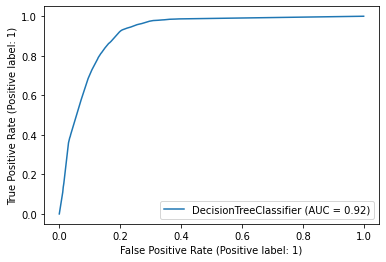

In [ ]:
test_y_pred1 = model1.predict(test_x)
CM = confusion_matrix(test_y, test_y_pred1)
print("Decision Tree Results")
print("Train Accuracy:",model1.score(x_train, y_train))
print("Test Accuracy:",model1.score(test_x, test_y))
print("Precision Score: ",metrics.precision_score(test_y, test_y_pred1))
print("Recall Score: ",metrics.recall_score(test_y, test_y_pred1)) # true positive rate, Sensitivity
print("F1 Score: ",metrics.f1_score(test_y, test_y_pred1))
print("Confusion Matrix: ")
print(confusion_matrix(test_y, test_y_pred1))
print("ROC curve ",metrics.plot_roc_curve(model1,test_x, test_y))

### With Model 2 Random Forest

In [ ]:
filename = '/content/drive/MyDrive/Computer Vision/Hyper_Parameter_Tunning/RF_Model.pkl'
model2 = pickle.load(open(filename, 'rb'))

Random Forest Results
Train Accuracy: 1.0
Test Accuracy: 0.9714970059880239
Precision Score:  0.9666209419295839
Recall Score:  0.9787037037037037
F1 Score:  0.9726247987117553
Confusion Matrix: 
[[1942   73]
 [  46 2114]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7fcddc504850>


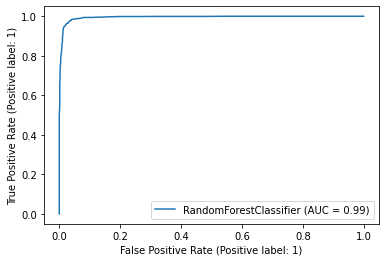

In [ ]:
test_y_pred2 = model2.predict(test_x)
CM = confusion_matrix(test_y, test_y_pred2)
print("Random Forest Results")
print("Train Accuracy:",model2.score(x_train, y_train))
print("Test Accuracy:",model2.score(test_x, test_y))
print("Precision Score: ",metrics.precision_score(test_y, test_y_pred2))
print("Recall Score: ",metrics.recall_score(test_y, test_y_pred2)) # true positive rate, Sensitivity
print("F1 Score: ",metrics.f1_score(test_y, test_y_pred2))
print("Confusion Matrix: ")
print(confusion_matrix(test_y, test_y_pred2))
print("ROC curve ",metrics.plot_roc_curve(model2,test_x, test_y))

### With Model 3 K Neighbors 

KNN results
Train Accuracy: 0.7925149700598803
Test Accuracy: 0.7911377245508983
Precision Score:  0.7584269662921348
Recall Score:  0.875
F1 Score:  0.8125537403267412
Confusion Matrix: 
[[1413  602]
 [ 270 1890]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7fcddc4dde10>


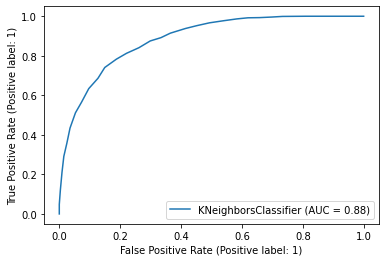

In [ ]:
test_y_pred3 = model3.predict(test_x)
CM = confusion_matrix(test_y, test_y_pred3)
print("KNN results")
print("Train Accuracy:",model3.score(x_train, y_train))
print("Test Accuracy:",model3.score(test_x, test_y))
print("Precision Score: ",metrics.precision_score(test_y, test_y_pred3))
print("Recall Score: ",metrics.recall_score(test_y, test_y_pred3)) # true positive rate, Sensitivity
print("F1 Score: ",metrics.f1_score(test_y, test_y_pred3))
print("Confusion Matrix: ")
print(confusion_matrix(test_y, test_y_pred3))
print("ROC curve ",metrics.plot_roc_curve(model3,test_x, test_y))

### With Model 4 G Naive Bayes

Gaussian Naive Bayes
Train Accuracy: 0.7362275449101796
Test Accuracy: 0.7350898203592814
Precision Score:  0.7097929936305732
Recall Score:  0.825462962962963
F2 Score:  0.7994081779053084
F1 Score:  0.7632705479452054
Confusion Matrix: 
[[1286  729]
 [ 377 1783]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7fcddbf814d0>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


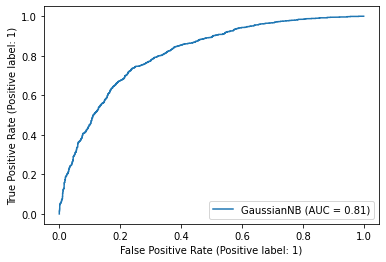

In [ ]:
test_y_pred4 = model4.predict(test_x)
CM = confusion_matrix(test_y, test_y_pred4)
print("Gaussian Naive Bayes")
print("Train Accuracy:",model4.score(x_train, y_train))
print("Test Accuracy:",model4.score(test_x, test_y))
print("Precision Score: ",metrics.precision_score(test_y, test_y_pred4))
print("Recall Score: ",metrics.recall_score(test_y, test_y_pred4)) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(test_y, test_y_pred4, beta=2.0))
print("F1 Score: ",metrics.f1_score(test_y, test_y_pred4))
print("Confusion Matrix: ")
print(confusion_matrix(test_y, test_y_pred4))
print("ROC curve ",metrics.plot_roc_curve(model4,test_x, test_y))

### With Model 5 SVM Linear 

SVM linear results
Train Accuracy: 0.6664670658682634
Test Accuracy: 0.6634730538922156
Precision Score:  0.7261833433193529
Recall Score:  0.5611111111111111
F2 Score:  0.5878358715685323
F1 Score:  0.6330634630451815
Confusion Matrix: 
[[1558  457]
 [ 948 1212]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7fcddbf05f50>


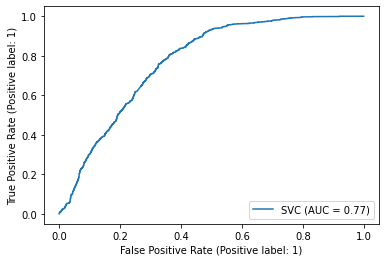

In [ ]:
test_y_pred5 = model5.predict(test_x)
CM = confusion_matrix(test_y, test_y_pred5)
print("SVM linear results")
print("Train Accuracy:",model5.score(x_train, y_train))
print("Test Accuracy:",model5.score(test_x, test_y))
print("Precision Score: ",metrics.precision_score(test_y, test_y_pred5))
print("Recall Score: ",metrics.recall_score(test_y, test_y_pred5)) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(test_y, test_y_pred5, beta=2.0))
print("F1 Score: ",metrics.f1_score(test_y, test_y_pred5))
print("Confusion Matrix: ")
print(confusion_matrix(test_y, test_y_pred5))
print("ROC curve ",metrics.plot_roc_curve(model5,test_x, test_y))

### With Model 6 SVM Poly

SVM polynomial
Train Accuracy: 0.7224550898203593
Test Accuracy: 0.7223952095808384
Precision Score:  0.663401893568397
Recall Score:  0.9407407407407408
F2 Score:  0.868153464923524
F1 Score:  0.778096879188206
Confusion Matrix: 
[[ 984 1031]
 [ 128 2032]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7fcddc542dd0>


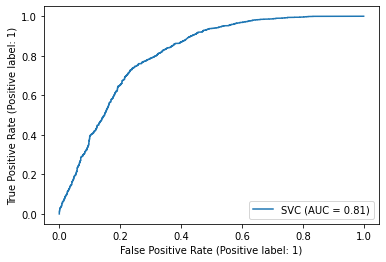

In [ ]:
test_y_pred6 = model6.predict(test_x)
CM = confusion_matrix(test_y, test_y_pred6)
print("SVM polynomial")
print("Train Accuracy:",model6.score(x_train, y_train))
print("Test Accuracy:",model6.score(test_x, test_y))
print("Precision Score: ",metrics.precision_score(test_y, test_y_pred6))
print("Recall Score: ",metrics.recall_score(test_y, test_y_pred6)) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(test_y, test_y_pred6, beta=2.0))
print("F1 Score: ",metrics.f1_score(test_y, test_y_pred6))
print("Confusion Matrix: ")
print(confusion_matrix(test_y, test_y_pred6))
print("ROC curve ",metrics.plot_roc_curve(model6,test_x, test_y))

### With Model 7 SVM Sigmoid 

SVM Sigmoid
Train Accuracy: 0.5224550898203593
Test Accuracy: 0.5202395209580838
Precision Score:  0.5369411764705883
Recall Score:  0.5282407407407408
F2 Score:  0.5299581978634463
F1 Score:  0.5325554259043175
Confusion Matrix: 
[[1031  984]
 [1019 1141]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7fcddbdf28d0>


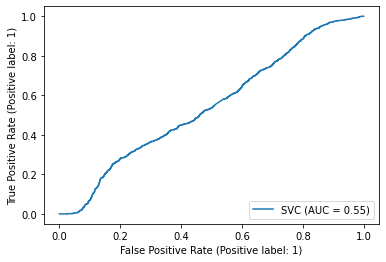

In [ ]:
test_y_pred7 = model7.predict(test_x)
CM = confusion_matrix(test_y, test_y_pred7)
print("SVM Sigmoid")
print("Train Accuracy:",model7.score(x_train, y_train))
print("Test Accuracy:",model7.score(test_x, test_y))
print("Precision Score: ",metrics.precision_score(test_y, test_y_pred7))
print("Recall Score: ",metrics.recall_score(test_y, test_y_pred7)) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(test_y, test_y_pred7, beta=2.0))
print("F1 Score: ",metrics.f1_score(test_y, test_y_pred7))
print("Confusion Matrix: ")
print(confusion_matrix(test_y, test_y_pred7))
print("ROC curve ",metrics.plot_roc_curve(model7,test_x, test_y))

### With Voting Based Classifier 

#### Soft Voting Classifier 

In [ ]:
from sklearn.ensemble import VotingClassifier

vmodels = VotingClassifier( estimators=[('DT', model1 ), ('RF', model2),('KNN', model3), ('NB', model4), ('SVM', model6)], voting='soft')
vmodels.fit(x_train, y_train)
voting_pred_s = vmodels.predict(x_test)
CM = confusion_matrix(y_test, voting_pred_s)
print("Voting Classifier Soft")
print("Train Accuracy:",vmodel.score(x_train, y_train))
print("Test Accuracy:",vmodel.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, voting_pred_s))
print("Recall Score: ",metrics.recall_score(y_test, voting_pred_s))
print("F1 Score: ",metrics.f1_score(y_test, voting_pred_s))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, voting_pred_s))
#print("ROC curve ",metrics.plot_roc_curve(model9,x_test, y_test))

Voting Classifier Soft
Train Accuracy: 0.8670658682634731
Test Accuracy: 0.8107784431137725
Precision Score:  0.7791164658634538
Recall Score:  0.8858447488584474
F1 Score:  0.829059829059829
Confusion Matrix: 
[[287 110]
 [ 50 388]]


#### Hard Voting Classifier 

In [ ]:
from sklearn.ensemble import VotingClassifier

vmodelh = VotingClassifier( estimators=[('DT', model1 ), ('RF', model2),('KNN', model3), ('NB', model4), ('SVM', model6)], voting='hard')
vmodelh.fit(x_train, y_train)
voting_pred_s = vmodelh.predict(x_test)
CM = confusion_matrix(y_test, voting_pred_s)
print("Voting Classifier Hard")
print("Train Accuracy:",vmodel.score(x_train, y_train))
print("Test Accuracy:",vmodel.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, voting_pred_s))
print("Recall Score: ",metrics.recall_score(y_test, voting_pred_s))
print("F1 Score: ",metrics.f1_score(y_test, voting_pred_s))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, voting_pred_s))
#print("ROC curve ",metrics.plot_roc_curve(model9,x_test, y_test))

Voting Classifier Hard
Train Accuracy: 0.8670658682634731
Test Accuracy: 0.8107784431137725
Precision Score:  0.7740667976424361
Recall Score:  0.8995433789954338
F1 Score:  0.8321013727560719
Confusion Matrix: 
[[282 115]
 [ 44 394]]
